# Atelier  : ANOVA

les noms  : 
1. OISSAFE Imad 
2. LATRACH EL Habib
3. ENNASTY Hamza

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

## Partie 1 : ANOVA à un facteur avec mesures répétées 

Le jeu de données consiste en des mesures de pression artérielle de 15 patients effectuées à quatre moments différents (Time 1, Time 2, Time 3, Time 4). Chaque patient a été évalué à ces quatre périodes, et les données enregistrées représentent la pression artérielle mesurée à chaque session.

`les hypothèses`
1. H0 (hypothèse nulle) : Il n'y a pas de différence significative entre les moyennes des mesures de pression artérielle à différents moments (Time 1, Time 2, Time 3, Time 4) et toutes les différences observées sont dues au hasard.
2. H1 (hypothèse alternative) : Au moins une des moyennes des mesures de pression artérielle à différents moments est différente des autres.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway , shapiro
import matplotlib.pyplot as plt

In [3]:
# importation de jeu donnees

df = pd.read_csv('dataset_patients.csv').drop(columns=['Unnamed: 0'])
df

,time1,time2,time3,time4
0,110,149,145,134
1,113,133,134,125
2,113,134,139,136
3,149,127,129,150
4,119,147,129,123
5,129,135,124,123
6,131,123,149,150
7,146,118,142,138
8,133,119,111,120
9,116,130,119,135


`visualisation de donnees`

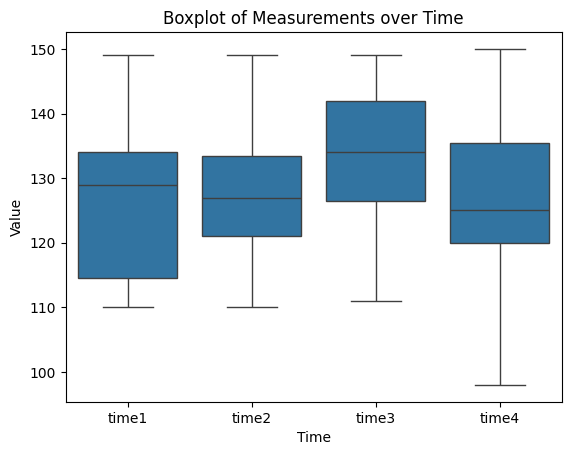

In [4]:


# Melt DataFrame from wide format to long format for easier plotting
df_melted = df.melt(var_name="Time", value_name="Value")

# Create a boxplot
sns.boxplot(x='Time', y='Value', data=df_melted)
plt.title('Boxplot of Measurements over Time')
plt.show()


 les boîtes dans le boxplot sont relativement similaires en taille et que les médianes sont proches les unes des autres, cela suggère que la dispersion des données à travers les différents moments est similaire.

**test de normalite des groupes**

In [5]:
# test de shapiro pour verifier la normalite des donnees

for i in df.columns:
    print(i, shapiro(df[i]))

    if shapiro(df[i])[1] < 0.05:
        print('---> la distribution de', i, 'n est pas normale')
        print('-'*50)
    else:
        print('---> la distribution de', i, 'est normale')
        print('-'*50)


time1 ShapiroResult(statistic=0.9114684462547302, pvalue=0.1426154524087906)
---> la distribution de time1 est normale
--------------------------------------------------
time2 ShapiroResult(statistic=0.9630049467086792, pvalue=0.7444441914558411)
---> la distribution de time2 est normale
--------------------------------------------------
time3 ShapiroResult(statistic=0.9454562067985535, pvalue=0.4559266269207001)
---> la distribution de time3 est normale
--------------------------------------------------
time4 ShapiroResult(statistic=0.9387900233268738, pvalue=0.36739906668663025)
---> la distribution de time4 est normale
--------------------------------------------------


**test de homogeneite des variances**

In [6]:
from scipy.stats import levene

# Perform Levene's test
stat, p = levene(df['time1'], df['time2'], df['time3'], df['time4'])

# affichage des resultats
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("les variances sont egales")
else:
    print("les variances ne sont pas egales")

Statistics=0.721, p=0.544
les variances sont egales


les condition sont vérifier, donc on peut appliquer le test ANOVA

In [7]:

f_val, p_val = f_oneway(df['time1'], df['time2'], df['time3'], df['time4'])

print("Resultat de test : F =", f_val, ", p =", p_val)

Resultat de test : F = 0.8900658614212926 , p = 0.4519906064207322


`interpretation du resultats`

1. L'F-score (0.89) est relativement proche de 1, ce qui suggère que la variance entre les moyennes des groupes est similaire à la variance à l'intérieur des groupes.

2. La p-value associée (0.452) est supérieure à un seuil de signification de 0.05. Cette p-value élevée indique qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle. En d'autres termes, cela suggère qu'il n'y a pas de différence significative entre les moyennes des mesures de pression artérielle à différents moments (Time 1, Time 2, Time 3, Time 4).

# Partie 2 :ANOVA à un facteur 

Ce jeu de données semble être une étude sur la prise de poids des rats en fonction de différents régimes
alimentaires (quantités élevées/faibles de bœuf, porc et céréales). Le design est un plan en blocs randomisés
avec plusieurs facteurs

In [8]:
dataset = pd.read_csv('dataset.csv', sep=";", decimal='.')
dataset.head()

,Weight_Gain,Diet_Amount,Diet_Type
0,118,1,1
1,117,1,1
2,111,1,1
3,107,1,1
4,104,1,1


1 : On veut étudier ici l'influence de type de régime alimentaire (Diet Type) sur le prise de poids des rats(Weight Gain).

On peut visualiser l'influence de la type de régime alimentaire en affichant ces boîtes à moustaches


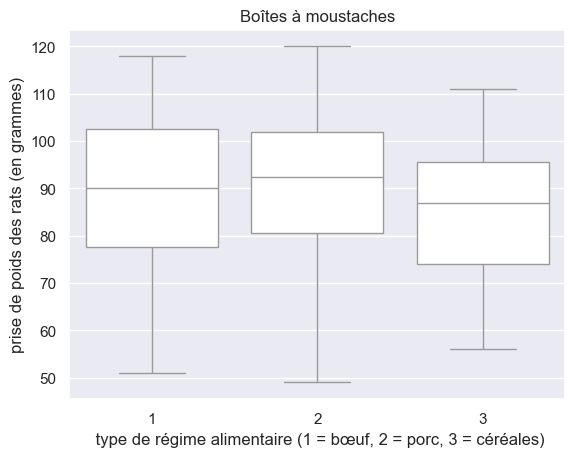

In [9]:
sns.set()

ax = sns.boxplot(x="Diet_Type", y="Weight_Gain", data=dataset, color='white')
plt.xlabel(' type de régime alimentaire (1 = bœuf, 2 = porc, 3 = céréales)')
plt.ylabel('prise de poids des rats (en grammes)')
plt.title('Boîtes à moustaches')
plt.show()

les boîtes à moustaches ne sont pas très distinctes, même s'il y a un peu plus de variance cela suggère que les distributions de la prise de poids ne sont pas significativement différentes enter les type de régime alimentaire

In [10]:

import statsmodels.formula.api as smf
import statsmodels.api as sm

anova_variete = smf.ols('Weight_Gain~Diet_Type', data=dataset).fit()
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Type,220.900000,1.0,0.801863,0.374238
Residual,15978.033333,58.0,NaN,NaN


Pour le facteur 'Diet_Type', la statistique de test F est de 0.801863 avec une valeur p de 0.374238.
Puisque la valeur p (0.374238) est supérieure au niveau de signification de 0.05, on ne rejette pas l'hypothèse nulle. donc les distributions de la prise de poids ne sont pas significativement différentes enter les type de régime alimentaire

2 : On veut étudier ici l'influence de quantité de régime alimentaire (Diet Amount) sur le prise de poids des rats(Weight Gain).

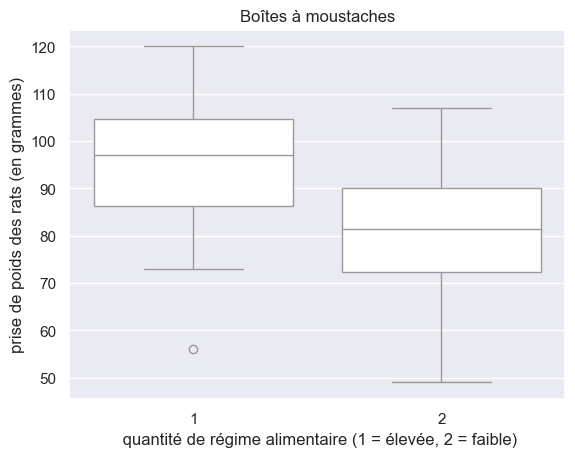

In [11]:
sns.set()

ax = sns.boxplot(x="Diet_Amount", y="Weight_Gain", data=dataset, color='white')
plt.xlabel(' quantité de régime alimentaire (1 = élevée, 2 = faible)')
plt.ylabel('prise de poids des rats (en grammes)')
plt.title('Boîtes à moustaches')
plt.show()

les boîtes à moustaches sont distinctes, cela suggère que les distributions de la prise de poids est significativement différente entre les différents niveaux de quantité de régime alimentaire

In [12]:
anova_variete = smf.ols('Weight_Gain~Diet_Amount', data=dataset).fit()
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Amount,3168.266667,1.0,14.102077,0.000403
Residual,13030.666667,58.0,NaN,NaN


Pour le facteur quantité de régime alimentaire (Diet Amount), la statistique de test F est de 14.102077 avec une valeur p très faible de 0.000403.
Puisque la valeur p est inférieure au niveau de signification de 0.05, on rejette l'hypothèse nulle.
Il y a des preuves statistiques suffisantes pour affirmer que la variation dans la prise de poids des rats est significativement différente entre les différents niveaux de (Diet Amount).

## Partie 3 : ANOVA à 2 facteurs

### 1. Modèles sans intéraction

In [13]:
anova1_sans_inter = smf.ols('Weight_Gain~Diet_Type+Diet_Amount', data=dataset).fit() # modèle anova sans interaction entre les facteurs 
sm.stats.anova_lm(anova1_sans_inter, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Type,220.900000,1.0,0.982945,0.325663
Diet_Amount,3168.266667,1.0,14.097930,0.000409
Residual,12809.766667,57.0,NaN,NaN


La formule `'Weight_Gain~Diet_Type+Diet_Amount'` spécifie un modèle qui prend en compte les effets principaux à la fois du type de régime alimentaire et de la quantité de régime alimentaire pour modéliser le gain de poids des rats.

`Diet_Type :`

La p-valeur de 0.3257 est supérieure à 0.05. Cela suggère que le type de régime alimentaire seul n'a pas d'effet statistiquement significatif sur le gain de poids des rats.

`Diet_Amount :`

La p-valeur de 0.0004 est inférieure à 0.05.Cela suggère que la quantité de régime alimentaire seul a un effet statistiquement significatif sur le gain de poids des rats.

In [14]:
anova2_sans_inter = smf.ols('Weight_Gain~Diet_Amount-Diet_Type', data=dataset).fit() # considérer uniquement l'effet de la quantité de régime alimentaire
sm.stats.anova_lm(anova2_sans_inter, typ=2)

,sum_sq,df,F,PR(>F)
Diet_Amount,3168.266667,1.0,14.102077,0.000403
Residual,13030.666667,58.0,NaN,NaN


La formule `'Weight_Gain~Diet_Amount-Diet_Type'` spécifie un modèle qui se concentre sur l'effet principal de la quantité de régime alimentaire, en excluant l'influence du type de régime alimentaire dans la modélisation du gain de poids des rats.

### 2. Modèle avec intéraction

In [15]:
anova2_avec_inter = smf.ols('Weight_Gain~Diet_Type*Diet_Amount', data=dataset).fit() # modèle anova à 2 facteurs avec interaction entre les facteurs
sm.stats.anova_lm(anova2_avec_inter, typ=2) 

,sum_sq,df,F,PR(>F)
Diet_Type,220.900000,1.0,1.037249,0.312842
Diet_Amount,3168.266667,1.0,14.876778,0.000299
Diet_Type:Diet_Amount,883.600000,1.0,4.148995,0.046397
Residual,11926.166667,56.0,NaN,NaN


La formule `'Weight_Gain~Diet_Type*Diet_Amount'` spécifie un modèle qui examine à la fois les effets principaux de "Diet_Type" et "Diet_Amount" ainsi que leur interaction,

Pour "Diet_Type", la p-valeur est 0.3128, supérieure à 0.05. On ne rejette pas l'hypothèse nulle, indiquant que le type de régime alimentaire seul n'a pas un effet significatif sur le gain de poids des rats.

Pour "Diet_Amount", la p-valeur est 0.0003, inférieure à 0.05. On rejette l'hypothèse nulle, suggérant que la quantité de régime alimentaire a un effet significatif sur le gain de poids des rats.

Pour l'interaction "Diet_Type:Diet_Amount", la p-valeur est 0.0464, inférieure à 0.05. On rejette l'hypothèse nulle, indiquant que l'effet combiné de "Diet_Type" et "Diet_Amount" a un impact significatif sur le gain de poids des rats.